In [1]:
import pandas as pd
import numpy as  np
import datetime
from time import strftime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Base_data=pd.read_csv("Data.csv")

In [3]:
Base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
Base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#modifying the date and time in standard form
Base_data["ScheduledDay"]=pd.to_datetime(Base_data["ScheduledDay"]).dt.date.astype("datetime64[ns]")
Base_data["AppointmentDay"]=pd.to_datetime(Base_data["AppointmentDay"]).dt.date.astype("datetime64[ns]")

In [6]:
Base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
Base_data["Sce_day_of_week"]= Base_data["ScheduledDay"].dt.dayofweek
Base_data["app_day_of_week"]= Base_data["AppointmentDay"].dt.dayofweek

In [8]:
Base_data["Sce_day_of_week"].value_counts()
#0 to 6 means monday=0,sunnday=6,saturday=5,tuesday=1.....ect

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Sce_day_of_week, dtype: int64

In [9]:
Base_data["app_day_of_week"].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_day_of_week, dtype: int64

In [10]:
Base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Sce_day_of_week', 'app_day_of_week'],
      dtype='object')

In [11]:
#Changing the colomn names
base_data=Base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [12]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   PatientId        110527 non-null  float64       
 1   AppointmentID    110527 non-null  int64         
 2   Gender           110527 non-null  object        
 3   ScheduledDay     110527 non-null  datetime64[ns]
 4   AppointmentDay   110527 non-null  datetime64[ns]
 5   Age              110527 non-null  int64         
 6   Neighbourhood    110527 non-null  object        
 7   Scholarship      110527 non-null  int64         
 8   Hypertension     110527 non-null  int64         
 9   Diabetes         110527 non-null  int64         
 10  Alcoholism       110527 non-null  int64         
 11  Handicap         110527 non-null  int64         
 12  SMSReceived      110527 non-null  int64         
 13  NoShow           110527 non-null  object        
 14  Sce_day_of_week  110

In [13]:
# dropping some columns which have no significance
base_data.drop(["PatientId","AppointmentID","Neighbourhood"],axis=1,inplace=True)

In [14]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   ScheduledDay     110527 non-null  datetime64[ns]
 2   AppointmentDay   110527 non-null  datetime64[ns]
 3   Age              110527 non-null  int64         
 4   Scholarship      110527 non-null  int64         
 5   Hypertension     110527 non-null  int64         
 6   Diabetes         110527 non-null  int64         
 7   Alcoholism       110527 non-null  int64         
 8   Handicap         110527 non-null  int64         
 9   SMSReceived      110527 non-null  int64         
 10  NoShow           110527 non-null  object        
 11  Sce_day_of_week  110527 non-null  int64         
 12  app_day_of_week  110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [15]:
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

Text(0, 0.5, 'Target count')

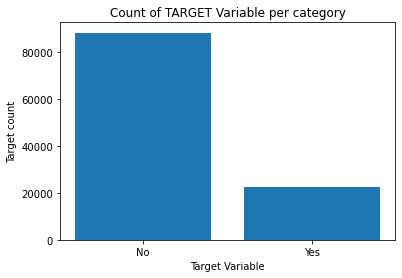

In [16]:
plt.bar(base_data['NoShow'].unique(),base_data['NoShow'].value_counts())
plt.title("Count of TARGET Variable per category")
plt.xlabel("Target Variable")
plt.ylabel("Target count")

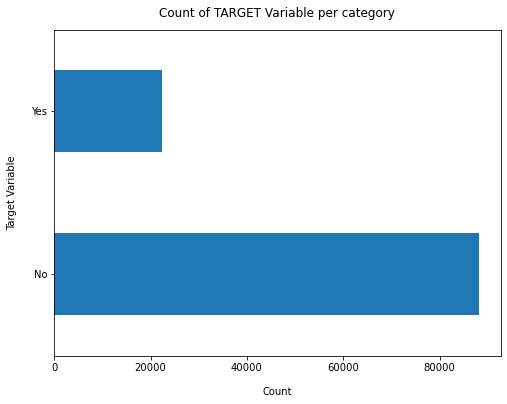

In [17]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [18]:
# calculating the % of appointments or not 
base_data["NoShow"].value_counts()/len(base_data["NoShow"])*100

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

In [19]:
#percentage of missing values in each columns
missing =base_data.isnull().sum()*100/base_data.shape[0]

In [20]:
missing=pd.DataFrame(missing).reset_index()
missing

,index,0
0,Gender,0.0
1,ScheduledDay,0.0
2,AppointmentDay,0.0
3,Age,0.0
4,Scholarship,0.0
5,Hypertension,0.0
6,Diabetes,0.0
7,Alcoholism,0.0
8,Handicap,0.0
9,SMSReceived,0.0


C:\Users\Sagar Guttal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


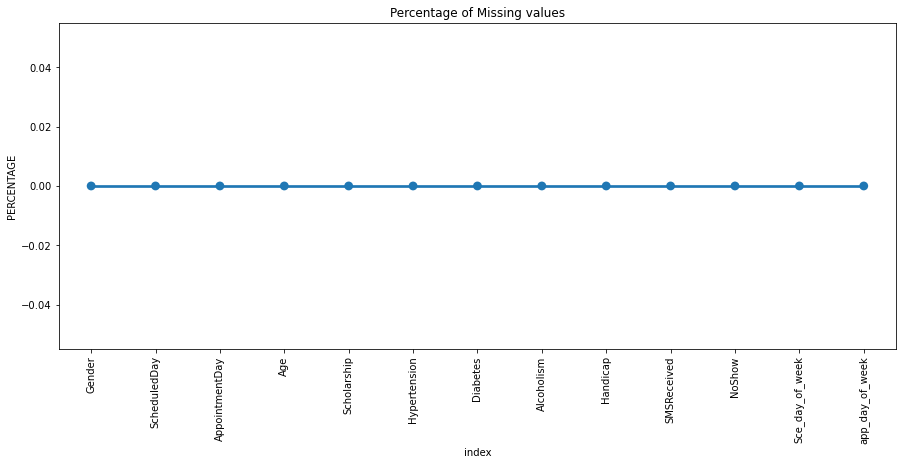

In [21]:
plt.figure(figsize=(15,6))
ax=sns.pointplot("index",0,data=missing)
plt.xticks(rotation=90,fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<h5>Missing Data - Initial Intuition<h5>

**Here, we don't have any missing data**
    .
General Thumb Rules:
<ol>
<li>For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.</li>
<li>For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
</li>
<li>As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.
</li>
</ol>

Data Cleaning
#### Create a copy of base data for manupulation & processing ####


In [22]:
new_data=base_data.copy()

In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Gender           110527 non-null  object        
 1   ScheduledDay     110527 non-null  datetime64[ns]
 2   AppointmentDay   110527 non-null  datetime64[ns]
 3   Age              110527 non-null  int64         
 4   Scholarship      110527 non-null  int64         
 5   Hypertension     110527 non-null  int64         
 6   Diabetes         110527 non-null  int64         
 7   Alcoholism       110527 non-null  int64         
 8   Handicap         110527 non-null  int64         
 9   SMSReceived      110527 non-null  int64         
 10  NoShow           110527 non-null  object        
 11  Sce_day_of_week  110527 non-null  int64         
 12  app_day_of_week  110527 non-null  int64         
dtypes: datetime64[ns](2), int64(9), object(2)
memory usage: 11.0+ MB


In [24]:
base_data["Age"].max()

115

In [25]:
#In age column age is provided for that we converted the ages in bins like 56 age person lies in this range 55-61 for example
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 20) for i in range(1, 118, 20)]
base_data['Age_group'] = pd.cut(base_data.Age, range(1, 130, 20), right=False, labels=labels)

In [26]:
base_data.Age_group

0         61 - 81
1         41 - 61
2         61 - 81
3          1 - 21
4         41 - 61
           ...   
110522    41 - 61
110523    41 - 61
110524    21 - 41
110525    21 - 41
110526    41 - 61
Name: Age_group, Length: 110527, dtype: category
Categories (6, object): ['1 - 21' < '21 - 41' < '41 - 61' < '61 - 81' < '81 - 101' < '101 - 121']

In [27]:
base_data.Age

0         62
1         56
2         62
3          8
4         56
          ..
110522    56
110523    51
110524    21
110525    38
110526    54
Name: Age, Length: 110527, dtype: int64

### Data Eploration ###

In [28]:
list(base_data.columns)

['Gender',
 'ScheduledDay',
 'AppointmentDay',
 'Age',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'NoShow',
 'Sce_day_of_week',
 'app_day_of_week',
 'Age_group']

--------------- Gender ---------------
F    71840
M    38687
Name: Gender, dtype: int64


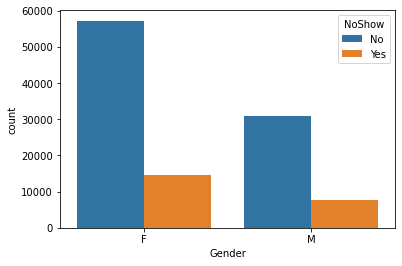

--------------- ScheduledDay ---------------
2016-05-03    4238
2016-05-02    4216
2016-05-16    4120
2016-05-05    4095
2016-05-10    4024
              ... 
2016-04-16       1
2016-01-28       1
2015-11-10       1
2016-03-19       1
2016-03-05       1
Name: ScheduledDay, Length: 111, dtype: int64


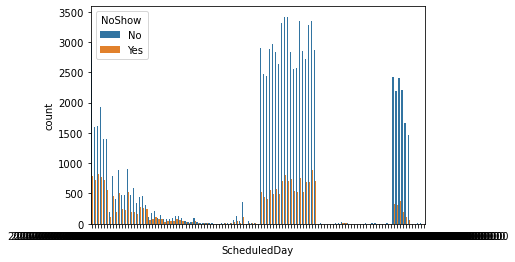

--------------- AppointmentDay ---------------
2016-06-06    4692
2016-05-16    4613
2016-05-09    4520
2016-05-30    4514
2016-06-08    4479
2016-05-11    4474
2016-06-01    4464
2016-06-07    4416
2016-05-12    4394
2016-05-02    4376
2016-05-18    4373
2016-05-17    4372
2016-06-02    4310
2016-05-10    4308
2016-05-31    4279
2016-05-05    4273
2016-05-19    4270
2016-05-03    4256
2016-05-04    4168
2016-06-03    4090
2016-05-24    4009
2016-05-13    3987
2016-05-25    3909
2016-05-06    3879
2016-05-20    3828
2016-04-29    3235
2016-05-14      39
Name: AppointmentDay, dtype: int64


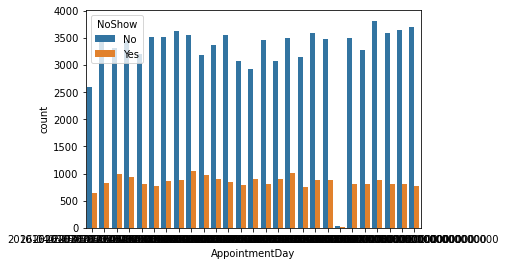

--------------- Age ---------------
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64


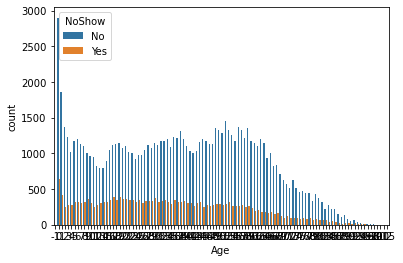

--------------- Scholarship ---------------
0    99666
1    10861
Name: Scholarship, dtype: int64


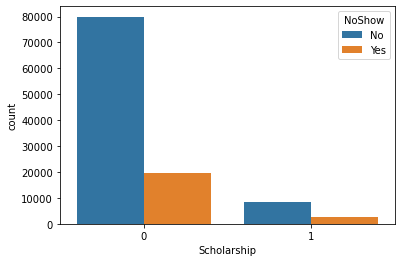

--------------- Hypertension ---------------
0    88726
1    21801
Name: Hypertension, dtype: int64


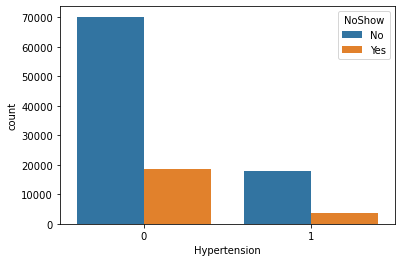

--------------- Diabetes ---------------
0    102584
1      7943
Name: Diabetes, dtype: int64


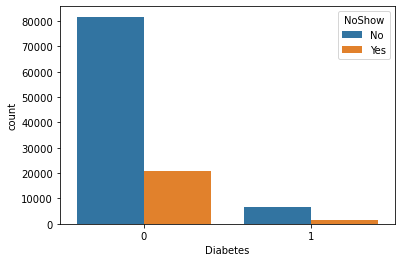

--------------- Alcoholism ---------------
0    107167
1      3360
Name: Alcoholism, dtype: int64


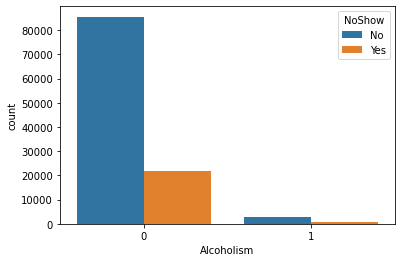

--------------- Handicap ---------------
0    108286
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64


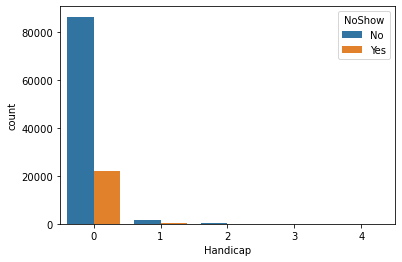

--------------- SMSReceived ---------------
0    75045
1    35482
Name: SMSReceived, dtype: int64


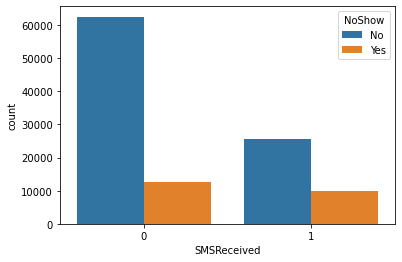

--------------- Sce_day_of_week ---------------
1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: Sce_day_of_week, dtype: int64


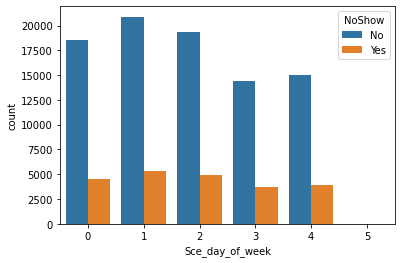

--------------- app_day_of_week ---------------
2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_day_of_week, dtype: int64


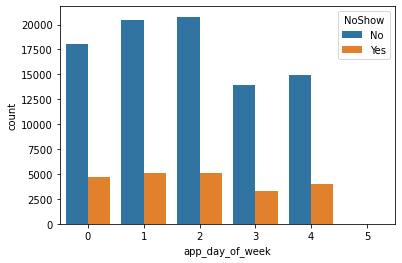

--------------- Age_group ---------------
41 - 61      30081
21 - 41      28835
1 - 21       28309
61 - 81      16910
81 - 101      2845
101 - 121        7
Name: Age_group, dtype: int64


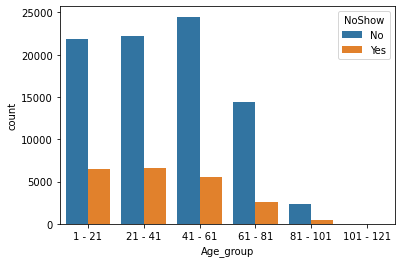

In [29]:
for i, predictor in enumerate(base_data.drop(columns="NoShow")):
    print("-"*15,predictor,"-"*15)
    print(base_data[predictor].value_counts())
    sns.countplot( x=predictor,hue="NoShow",data=base_data,)
    plt.show()

In [30]:
base_data["NoShow"]=np.where(base_data.NoShow=="Yes",1,0)
base_data.NoShow.value_counts()

0    88208
1    22319
Name: NoShow, dtype: int64

In [31]:
base_data_dummies=pd.get_dummies(base_data)
base_data_dummies

,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,Sce_day_of_week,app_day_of_week,Gender_F,Gender_M,Age_group_1 - 21,Age_group_21 - 41,Age_group_41 - 61,Age_group_61 - 81,Age_group_81 - 101,Age_group_101 - 121
0,2016-04-29,2016-04-29,62,0,1,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
1,2016-04-29,2016-04-29,56,0,0,0,0,0,0,0,4,4,0,1,0,0,1,0,0,0
2,2016-04-29,2016-04-29,62,0,0,0,0,0,0,0,4,4,1,0,0,0,0,1,0,0
3,2016-04-29,2016-04-29,8,0,0,0,0,0,0,0,4,4,1,0,1,0,0,0,0,0
4,2016-04-29,2016-04-29,56,0,1,1,0,0,0,0,4,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2016-05-03,2016-06-07,56,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
110523,2016-05-03,2016-06-07,51,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0
110524,2016-04-27,2016-06-07,21,0,0,0,0,0,1,0,2,1,1,0,0,1,0,0,0,0
110525,2016-04-27,2016-06-07,38,0,0,0,0,0,1,0,2,1,1,0,0,1,0,0,0,0


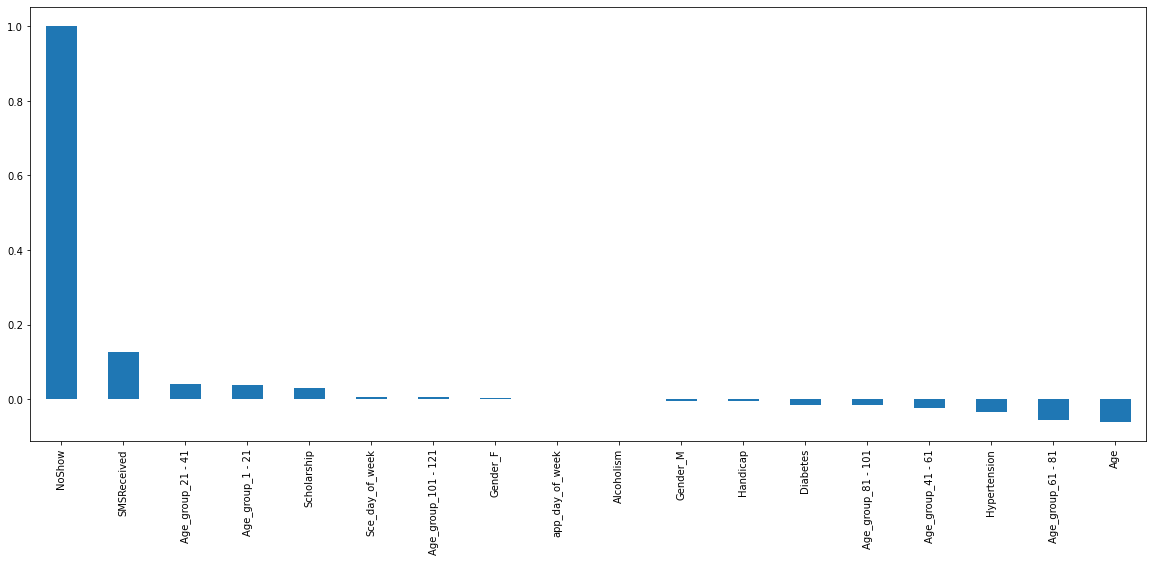

In [38]:
#Build correlation with NoShow
plt.figure(figsize=(20,8))
base_data_dummies.corr()["NoShow"].sort_values(ascending = False).plot(kind="bar")
plt.show()

<AxesSubplot:>

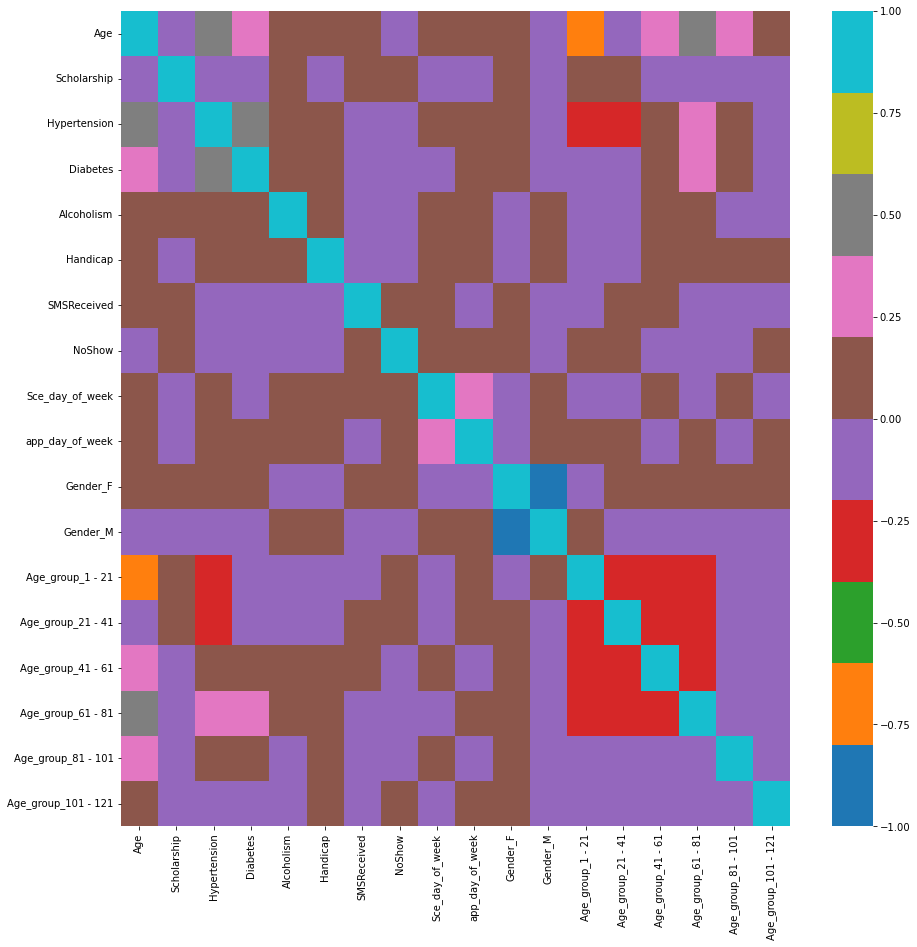

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(base_data_dummies.corr(),cmap="tab10")

### Bia variate analysis ###

In [41]:
new_df1_target0=base_data.loc[base_data["NoShow"]==0]
new_df1_target1=base_data.loc[base_data["NoShow"]==1]

In [45]:
new_df1_target1["Hypertension"].value_counts().index


Int64Index([0, 1], dtype='int64')

In [46]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

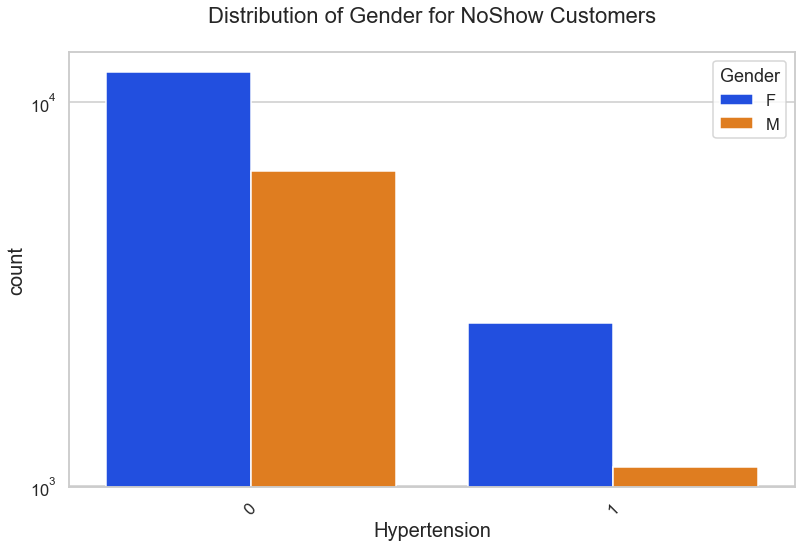

In [47]:
uniplot(new_df1_target1,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

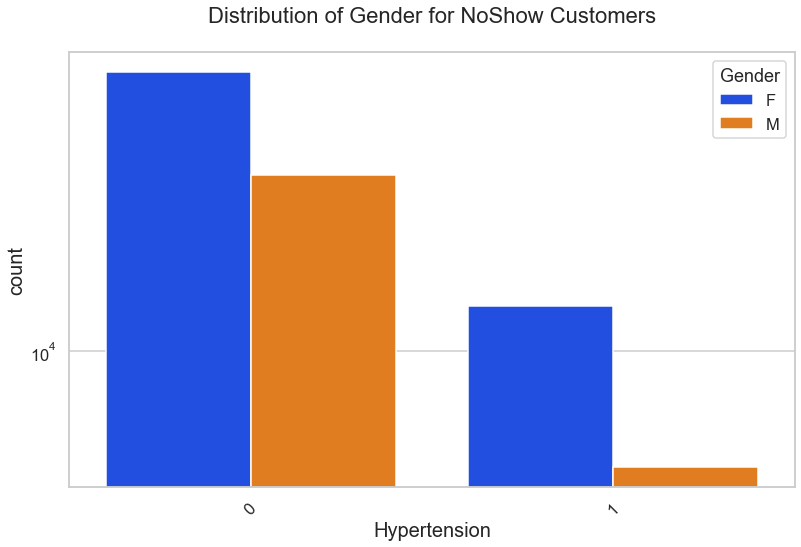

In [48]:
uniplot(new_df1_target0,col='Hypertension',title='Distribution of Gender for NoShow Customers',hue='Gender')

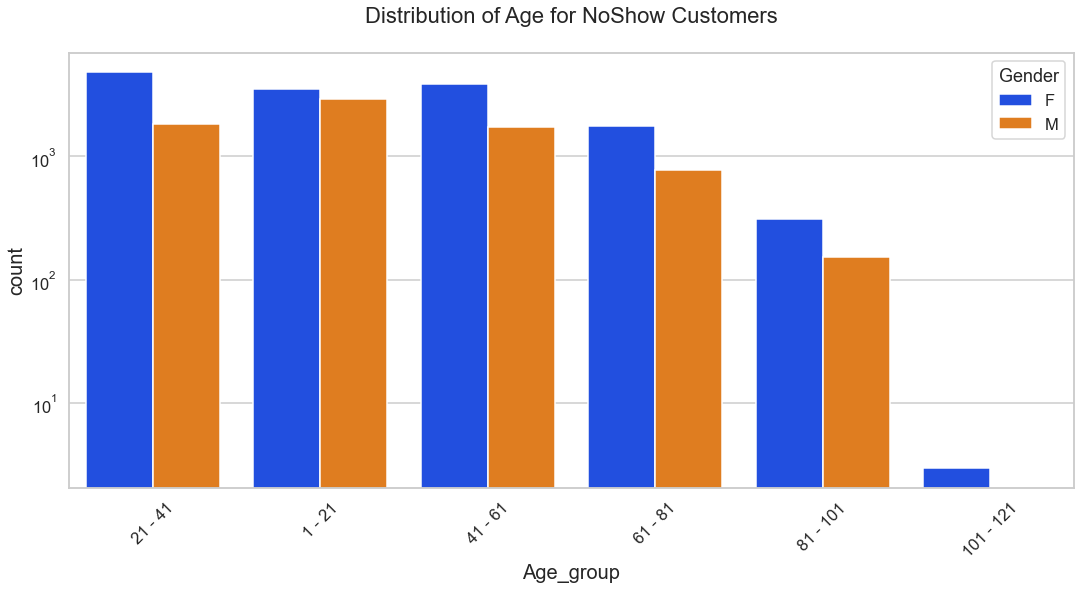

In [49]:
uniplot(new_df1_target1,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

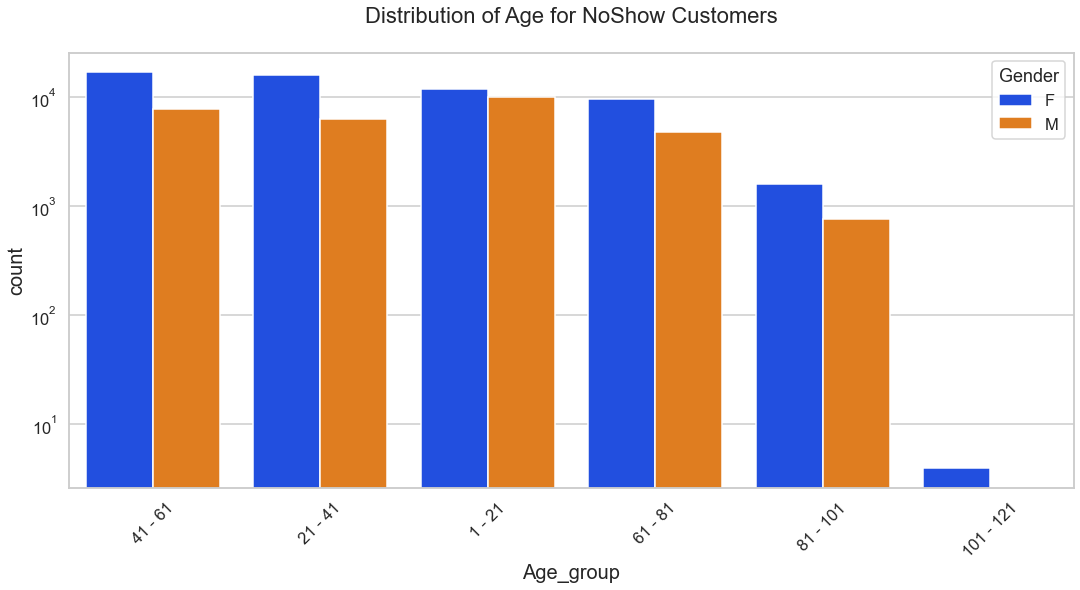

In [50]:
uniplot(new_df1_target0,col='Age_group',title='Distribution of Age for NoShow Customers',hue='Gender')

### Findings
<li>Female patients have taken more appointments then male patients 
<li>Ratio of Nohow and Show is almost equal for age group except Age 0 and Age 1 with 80% show rate for each age group
Each Neighbourhood have almost 80% show rate
<li>There are 99666 patients without Scholarship and out of them around 80% have come for the visit and out of the 21801 patients with Scholarship around 75% of them have come for the visit.
<li>there are around 88,726 patients without Hypertension and out of them around 78% have come for the visit and Out of the 21801 patients with Hypertension around 85% of them have come for the visit.
<li>there are around 102,584 patients without Diabetes and out of them around 80% have come for the visit and Out of the 7,943 patients with Diabetes around 83% of them have come for the visit.
<li>there are around 75,045 patients who have not received SMS and out of them around 84% have come for the visit and out of the 35,482 patients who have received SMS around 72% of them have come for the visit.
<li>there is no appointments on sunday and on saturday appointments are very less in comparision to other week days #####